In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1001)

In [2]:
# 生成随机的聚类数据
n = 400
centers = [[1, 1], [-1, -1]]
data, _ = make_blobs(n_samples=n, centers=centers, cluster_std=0.5)

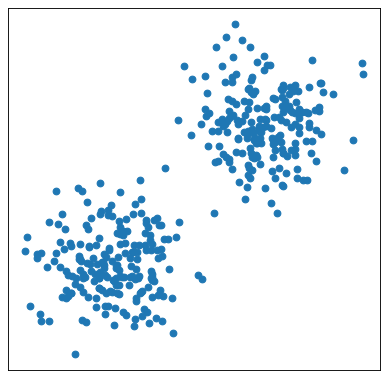

In [3]:
# 将训练数据可视化
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:, 0], data[:, 1])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
def _visualize(ax, data, labels, centers):
    '''
    将模型结果可视化
    '''
    colors = ['#82CCFC', 'k']
    if labels is None:
        ax.scatter(data[:, 0], data[:, 1])
    else:
        ax.scatter(data[:, 0], data[:, 1], c=[colors[i] for i in labels], marker='o', alpha=0.6)
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', c=colors, edgecolors='white',
               s=700., linewidths=2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [5]:
def train_model(data, step):
    '''
    使用KMeans模型对数据聚类
    '''
    model = KMeans(n_clusters=2, init=np.array([[1, -1], [-1, 1]]),
                   max_iter=step, algorithm='lloyd', n_init=1)
    model.fit(data)
    return model

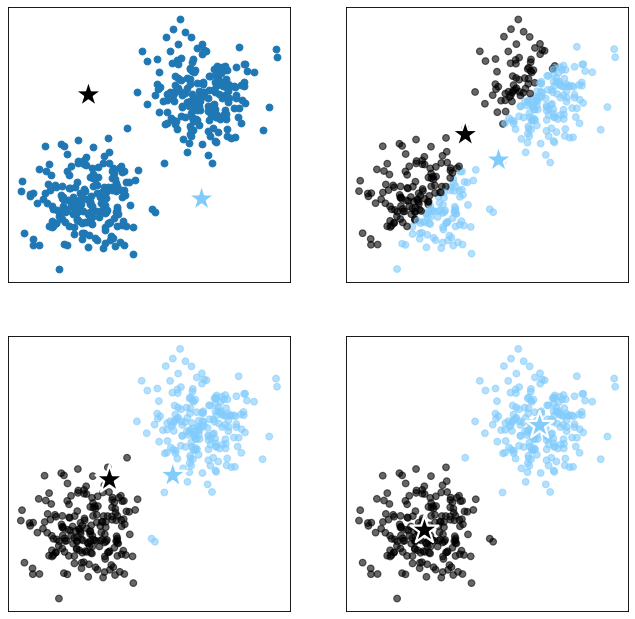

In [6]:
# 创建一个图形框
fig = plt.figure(figsize=(10, 10), dpi=80)
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    if i == 0:
        _visualize(ax, data, None, np.array([[1, -1], [-1, 1]]))
    else:
        model = train_model(data, i)
        _visualize(ax, data, model.labels_, model.cluster_centers_)
plt.savefig('kmeans_process.png', dpi=200)
plt.show()